In [17]:
using CSV
using DataFrames
using Statistics
using Plots
using GLM
using StatsPlots

loading data

In [33]:
df = CSV.read("../prognoza.csv", DataFrame)

missing_counts = map(col -> sum(ismissing, col), eachcol(df))

describe(df)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,Area,,Miasta,,Wieś,0,String15
2,Year,2032.0,2014,2032.0,2050,0,Int64
3,Population_31_XII,2.44316e7,15124953,2.13558e7,38461752,0,Int64
4,Births,1.97072e5,116323,152405.0,360447,0,Int64
5,Deaths,276926.0,148899,256255.0,442338,0,Int64
6,Internal_Migration_Inflow,2.22488e5,148604,172017.0,410975,0,Int64
7,Internal_Migration_Outflow,2.22489e5,127490,188286.0,410979,0,Int64
8,Immigration,14220.5,3831,15572.0,24389,0,Int64
9,Emigration,16259.3,6505,17884.0,24389,0,Int64


# Population over time plot

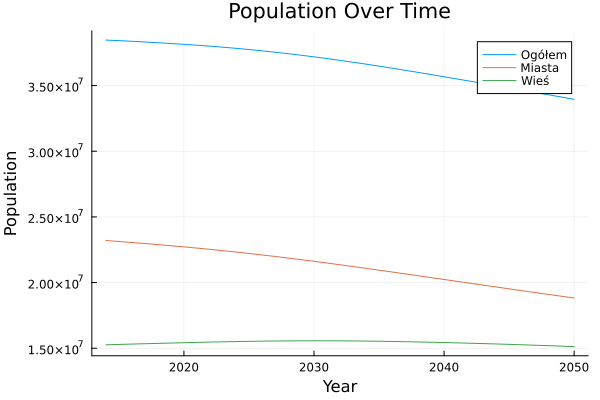

In [9]:
areas = unique(df.Area)
population_plot = plot(xlabel="Year", ylabel="Population", title="Population Over Time")
for area in areas
    area_data = df[df.Area .== area, :]
    plot!(population_plot, area_data.Year, area_data.Population_31_XII, label=area)
end
savefig(population_plot, "../graphs/population_over_time.png")
display(population_plot)

# births and deaths over time plot

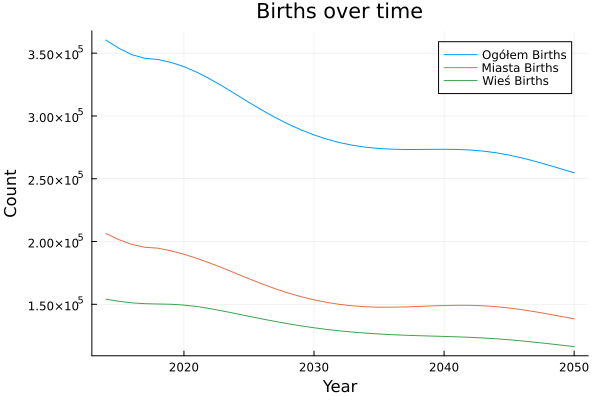

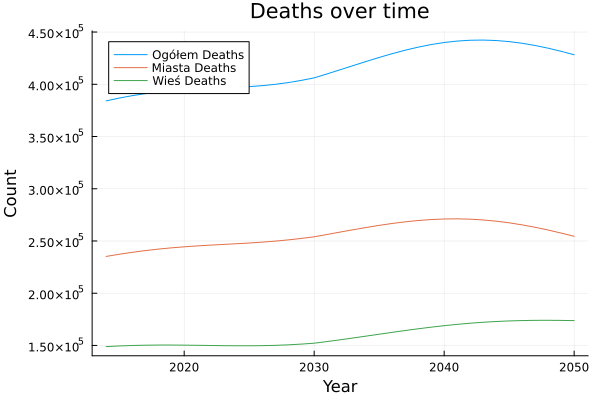

In [12]:
births_plot = plot(xlabel="Year", ylabel="Count", title="Births over time")
deaths_plot = plot(xlabel="Year", ylabel="Count", title="Deaths over time")
for area in areas
    area_data = df[df.Area .== area, :]
    plot!(births_plot, area_data.Year, area_data.Births, label="$area Births")
    plot!(deaths_plot, area_data.Year, area_data.Deaths, label="$area Deaths")
end
savefig(births_plot, "../graphs/births_over_time.png")
savefig(deaths_plot, "../graphs/deaths_over_time.png")
display(births_plot)
display(deaths_plot)

# average population change

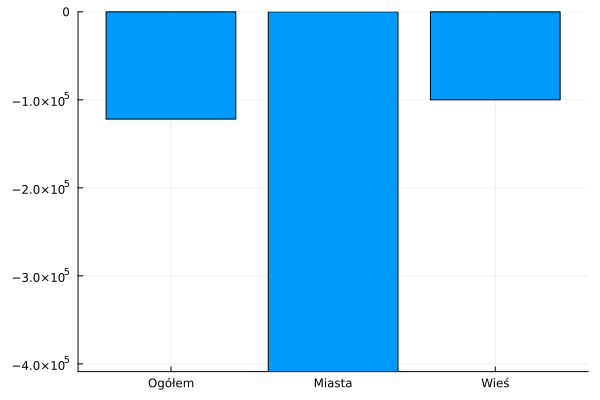

In [49]:
df.Population_Change = [0; diff(df.Population_31_XII)]
average_population_change = combine(groupby(df, :Area), :Population_Change => mean => :Average_Population_Change)

average_population_change_bar = bar(average_population_change.Area, average_population_change.Average_Population_Change, legend=false)
savefig(average_population_change_bar, "../graphs/average_population_change.png")
display(average_population_change_bar)

# correlation matrix

Jak czytać te wartości:
- Wartości na przekątnej to korelacja zmiennej z samą sobą, więc zawsze wynosi 1.
- Wartości powyżej przekątnej to korelacja między dwiema zmiennymi.
- Wartości poniżej przekątnej to to samo co powyżej, ale zmienna pierwsza jest na osi y, a druga na osi x.
- Im jaśniejszy kolor, tym większa korelacja.
- Im ciemniejszy kolor, tym mniejsza korelacja.

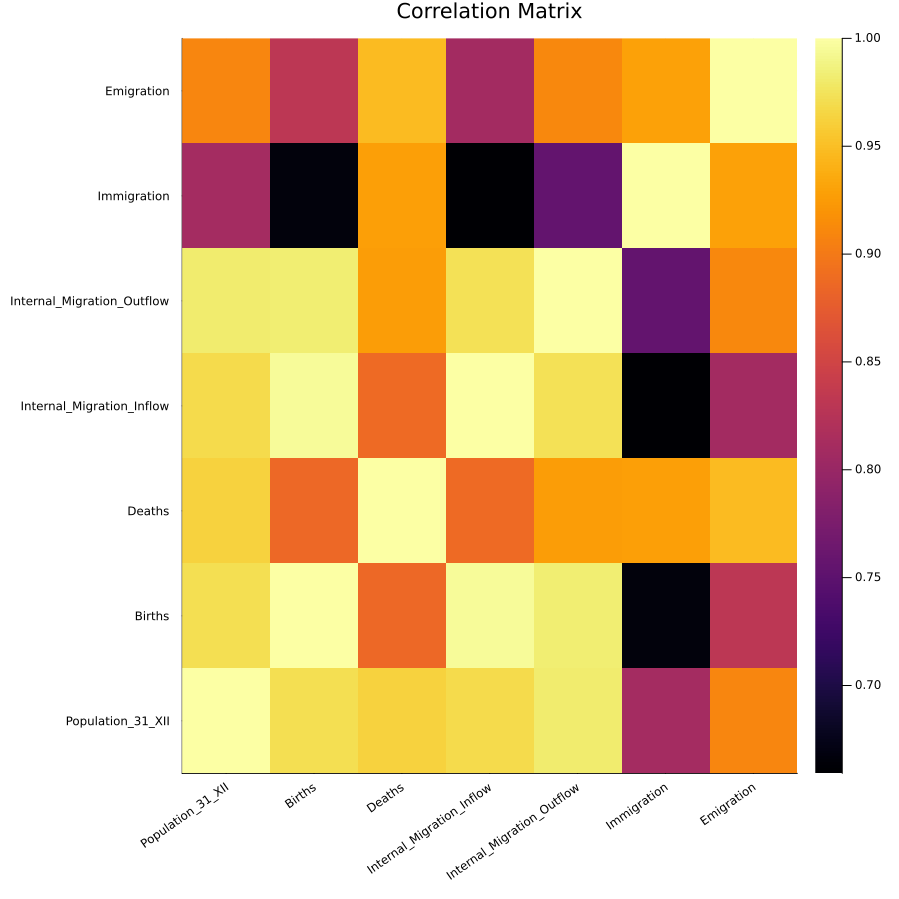

In [45]:
selected_data = select(df, Not([:Area, :Year]))
data_matrix = Matrix(selected_data)
correlation_matrix = cor(data_matrix)
variable_names = names(selected_data)

correlation_plot = heatmap(correlation_matrix, title="Correlation Matrix", xticks=(1:length(variable_names), variable_names), yticks=(1:length(variable_names), variable_names), xrotation=35, size=(900,900))
savefig(correlation_plot, "../graphs/correlation_matrix.png")
display(correlation_plot)

# Population distribution

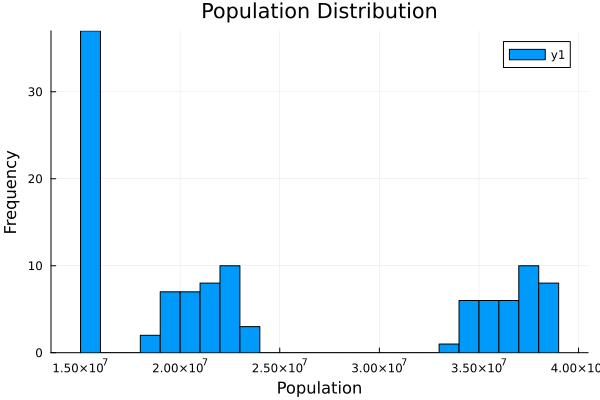

In [47]:
population_distribution_plot = histogram(df.Population_31_XII, bins=30, xlabel="Population", ylabel="Frequency", title="Population Distribution")
savefig(population_distribution_plot, "../graphs/population_distribution.png")
display(population_distribution_plot)

Jest to rozkład zmiennej population w zbiorze danych.